### Introduction

"Visualization gives you answers to questions you didn’t know you had.” – Ben Schneiderman

In the past couple of sections, we learned about collecting and processing our data via APIs and Python.  Of course many of use best process trends in the data visually.  It's time to start using Python to generate visualizations of our data.

### Graph starting points: X axis and Y axis

The main way that we will visualize our data is with graphs.

<img src="./graph-intro.png" width="60%" />

Take a look at the graph above.  As you'll see, there are two dark gray lines that intersect.  One of the lines is along the bottom.  That is called our **x axis**.  And dark gray line on the left is our **y axis**.  These x and y axes allow us to take numbers and represent these numbers as a location on the graph.  

For example, let's say that every other day, we track the amount of money a business earns.  And we do this for 10 days.  We check in on the second day and see that the business earns 3 dollars (it's a very small business).  We can represent the second day by moving two spaces to the right along, and three spaces up to represent the amount of earned.  

Now take a look at the graph below where you can see we did with the first blue marker on the left.

<img src="./plot-with-markers.png" width="80%"/>

So hopefully you can see that representing our numbers on a graph, can help us get some insight.  In the graph above, we see that each day that we check in on the business, the amount of money taken in that day increases.

The other thing to notice is that we can annotate our points with the format `(x value, y value)`, so (2, 3) is shorthand for a point whose x value is 2 and y value is 3.

### Representing our data in Python

Let's start by representing our single point `(2, 3)` in Python.  Let's do it using a dictionary.

In [2]:
{'x': 2, 'y': 3}

2

And if we want to represent all of our each of the points above, we can use a list of dictionaries.

In [3]:
values = [{'x': 2, 'y': 3}, {'x': 4, 'y': 5}, {'x': 6, 'y': 12}, {'x': 8, 'y': 13}, {'x': 10, 'y': 17}]

But a different way to represent these is as a list of x values, and y values.

The only issue with this above format is that it's not super easy to place data in this format.  Lots of times it's easier to write out these x and y values separately.  

For example, let's quickly generate all of the x values.

In [11]:
x_values = list(range(0, 11, 2))
x_values

[0, 2, 4, 6, 8, 10]

So it might be nicer to write out our x and y values separately.

In [12]:
trace = {'x': [2, 4, 6, 8, 10], 'y': [3, 5, 12, 13, 17]}

> We'll talk about what the word `trace` means in our upcoming lesson on Plotly.

As you'll see, this is how we'll represent our data for plotting. With one list of all of the x coordinates of our points, and a separate list of each of the y coordinates of our points.  And each of these two lists in a dictionary with keys of `'x'` and `'y'`.

### Introduction to Plotly

A great tool for data visualization is called [Plotly](https://plot.ly/).  Let's get started.

We download Plotly with the following command.

In [ ]:
!pip install plotly

> Press shift enter to run the above line of code.

<img src="plotly-two-traces.png" width="60%"> 

### Understanding the components of our plot

Now plotly can make graphs like the one below.

Imagine that the this graph above is used to show the amount of money earned in the first, second, third and fourth month for a restaurant chain.  And imagine that the orange line represents the amount of money earned by a restaurant in Dallas TX, and the blue line represents the amount of money earned by the restaurant in Houston.  So this entire graph shows how the two restaurants are doing side by side.

Now let's refer to the components of the graph the way that plotly does.   Plotly calls each of those blue and orange lines a **`trace`**.  We can have as many traces as we want, just as our restaurant chain could potentially have many more restaurants and we want a line for each.  Second, plotly calls that entire graph above a `figure`.  

So, the takeaway here is that **a figure consists of a list of traces.**

### Building those components in code

Ok, now it's time to use plotly.  We already downloaded it with pip, so now we need to import it.  We do so with the following lines.

In [3]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

You'll notice that we imported the `iplot` method from the `plotly.offline`.  Let's use it to make our first figure, and then we'll try to understand this code better below.

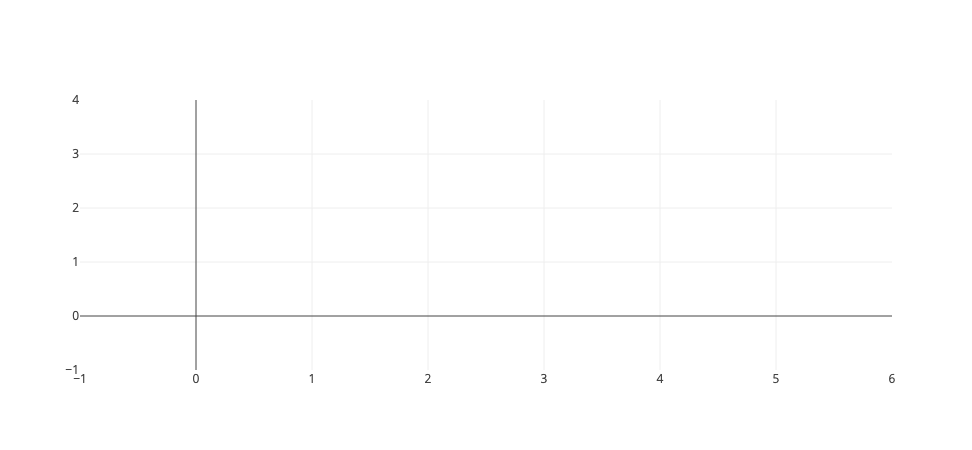

In [4]:
iplot([{}])

Ah yes, an empty graph.  Let's look at the code again to make sense of it.

```python
iplot([
    {}
])

```

Remember our takeaway from above, **a figure is a list of traces**.  So that list right after the parentheses is our *figure* and the dictionary is a trace.  Because that dictionary is empty we don't see any lines on the screen.

Let's change that.

We still need our figure, but this time inside of the figure, we'll use a trace with some data.

<img 

Now let's take a look at this new code, focusing in on that trace variable.

```python
trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16]}
iplot([
   trace
])
```

As we can see, the trace variable is just a dictionary with keys `'x'` and `'y'`.  The `x` key points to a list of each of the x cooridinates for the corresponding points and the `y` key points to a list of the `y` coordinates.  

Now let's create a figure with two traces.  This is easy enough.  Each trace is a dictionary.  And we make each trace an element in our list (which is for our figure).  This makes sense, as our figure is a list of traces.


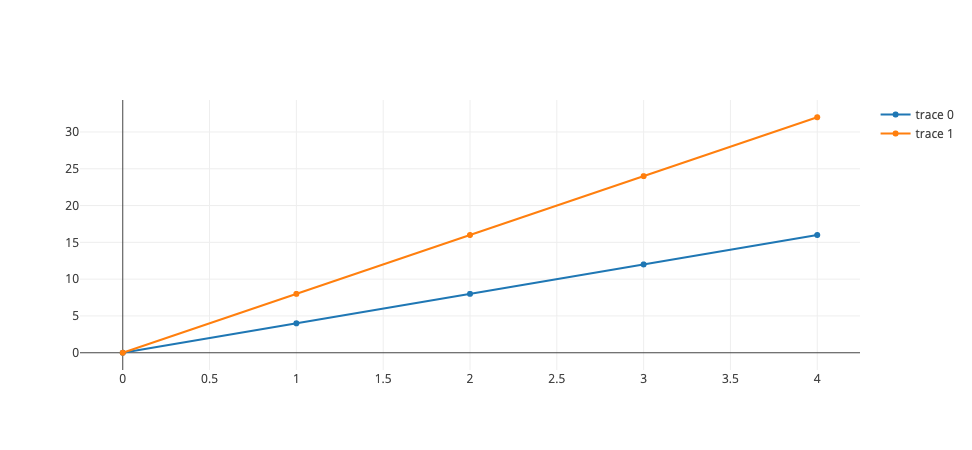

In [6]:
first_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16]}
second_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 8, 16, 24, 32]}

iplot([
   first_trace, second_trace
])

Plotly connects each of our datapoints with a line by default.  However, if we want to just show the markers, we specify this in our trace dictionary with setting a key of `'mode'` equal to the value `'markers'`.

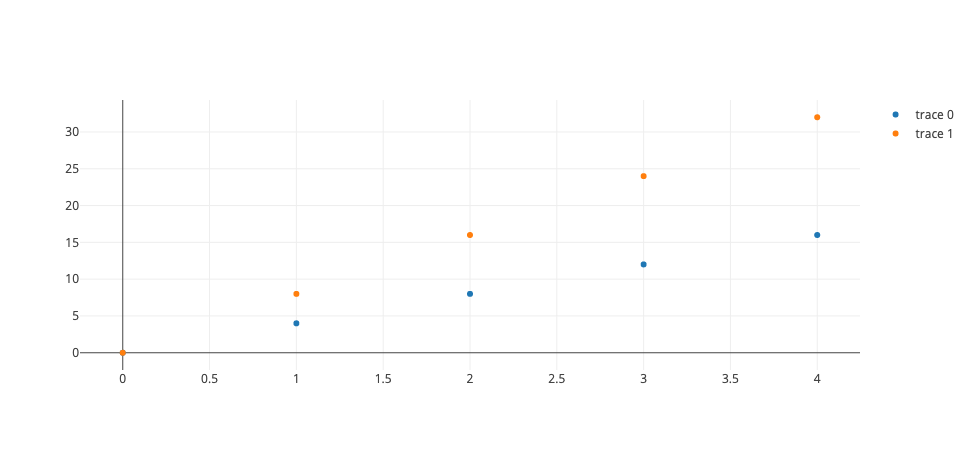

In [24]:
first_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 4, 8, 12, 16], 'mode': 'markers'}
second_trace =  {'x': [0, 1, 2, 3, 4], 'y': [0, 8, 16, 24, 32], 'mode': 'markers'}
iplot([
   first_trace, second_trace
])

### Plotting our Revenue Data

Ok, now let's try to plot some of our restaurant revenue data from Max's.  First, we can load the data with the following.

In [14]:
import json
with open('max-revenue.json') as file:
    revenues = json.load(file)

Now we have our revenue data.  Let's take a quick look at it again.

In [15]:
len(revenues)

25

In [16]:
revenues[0:3]

[{'total_receipts': 56182, 'end_date': '2016-12-31T00:00:00.000'},
 {'total_receipts': 9400, 'end_date': '2017-08-31T00:00:00.000'},
 {'total_receipts': 50574, 'end_date': '2016-06-30T00:00:00.000'}]

Ok, so each dictionary has the total receipts and the `begin_date`.  Our goal here is to plot the revenue data per month.  The problem we have is that our data is completely out of order.  We can sort our list to have our date increasing by month.  This takes a couple of steps.  

First, we need to convert our end_date values into dates.

Ok, now let's coerce the string into a datetime.  First we ask the great oracle Google how we can [convert a string into a datetime](https://www.google.com/search?q=datetime+from+string+python&oq=datetime+from+st&aqs=chrome.0.0j69i57j0l4.2653j0j7&sourceid=chrome&ie=UTF-8).  Then we follow the directions in the search results. [One of those results](https://chrisalbon.com/python/basics/strings_to_datetime/) says we can convert with somthing like the following.

In [17]:
from datetime import datetime
start = '2011-01-03'
datetime.strptime(start, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

That gets us part of the way, but our date information includes information about minutes or seconds. So we can either remove that ending data, or we can do some more searching on Google. We go for the searching on Google and wind up with the following.

In [20]:
from datetime import datetime
end_date = revenues[0]['end_date']
datetime.strptime(end_date, '%Y-%m-%dT%H:%M:%S.%f')

datetime.datetime(2016, 12, 31, 0, 0)

Ok, now it's that we were able to accomplish this for the attributes of one dictionary, let's use a loop to coerce each dictionary in `revenues`.

In [24]:
from datetime import datetime
formatted_revenues = []
for revenue in revenues:
    total = int(revenue['total_receipts'])
    end_date = datetime.strptime(revenue['end_date'], '%Y-%m-%dT%H:%M:%S.%f')
    revenue = {
        'total_receipts': total,
        'end_date': end_date,
    }
    formatted_revenues.append(revenue)
formatted_revenues[0:2]

[{'total_receipts': 56182, 'end_date': datetime.datetime(2016, 12, 31, 0, 0)},
 {'total_receipts': 9400, 'end_date': datetime.datetime(2017, 8, 31, 0, 0)}]

Ok, now we can sort by date time.

In [30]:
sorted_by_date = sorted(revenues, key = lambda revenue: revenue['end_date'])
sorted_by_date[0:3]

[{'total_receipts': 0, 'end_date': '2015-08-31T00:00:00.000'},
 {'total_receipts': 66609, 'end_date': '2015-09-30T00:00:00.000'},
 {'total_receipts': 67048, 'end_date': '2015-10-31T00:00:00.000'}]

Now that our date is in the right format, we just create the list of dates for our x values, and the total receipts for the y values.

In [32]:
dates = list(map(lambda revenue: revenue['end_date'], revenues))
totals = list(map(lambda revenue: revenue['total_receipts'], revenues))

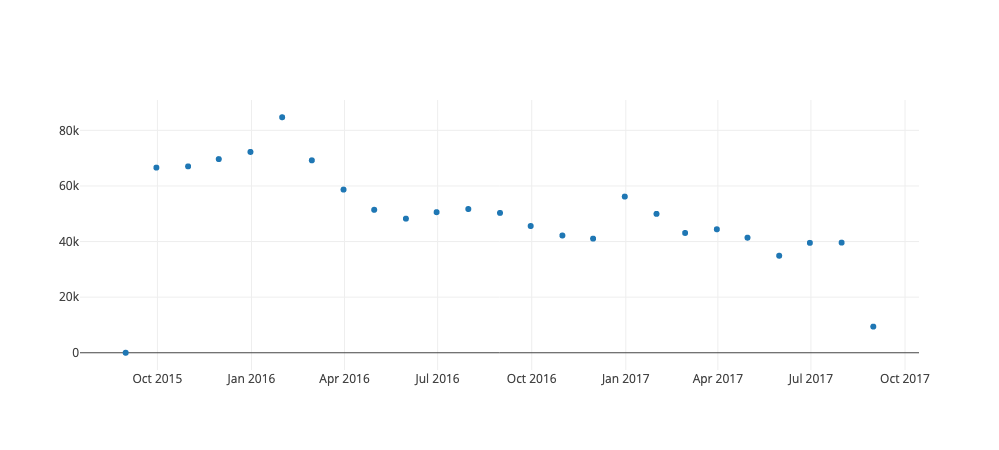

In [34]:
iplot([{'x': dates, 'y': totals, 'mode': 'markers'}])

> Perhaps format by month number instead, and then delay talking about how we did this as a bonus.